Run LDA on some Wikipedia articles with "known" themes.  Will pull 10 articles across 5 "topics" that are rather different from each other:

- Chemistry
- Authors
- Actors/Actresses
- Arkansas cities
- Fruits

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import wikipedia
from string import punctuation

In [2]:
# Install nltk things
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kenneth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kenneth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kenneth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kenneth/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Get Wikipedia articles

In [3]:
# Wikipedia fetching
def get_page(title):
    return wikipedia.page(title, auto_suggest=False)

In [4]:
chemistry = [
    'atom',
    'matter',
    'electron',
    'molecule',
    'phase (matter)',
    'chemical bond',
    'ion',
    'base (chemistry)',
    'chemical reaction',
    'energy'
]

authors = [
    'William Shakespeare',
    'Agatha Christie',
    'Barbara Cartland',
    'Danielle Steel',
    'Harold Robbins',
    'Georges Simenon',
    'Enid Blyton',
    'Sidney Sheldon',
    'Eiichiro Oda',
    'J. K. Rowling'
]

In [5]:
titles = chemistry + authors

In [6]:
articles = {
    x: get_page(x)
    for x in titles
}

In [7]:
articles

{'atom': <WikipediaPage 'Atom'>,
 'matter': <WikipediaPage 'Matter'>,
 'electron': <WikipediaPage 'Electron'>,
 'molecule': <WikipediaPage 'Molecule'>,
 'phase (matter)': <WikipediaPage 'Phase (matter)'>,
 'chemical bond': <WikipediaPage 'Chemical bond'>,
 'ion': <WikipediaPage 'Ion'>,
 'base (chemistry)': <WikipediaPage 'Base (chemistry)'>,
 'chemical reaction': <WikipediaPage 'Chemical reaction'>,
 'energy': <WikipediaPage 'Energy'>,
 'William Shakespeare': <WikipediaPage 'William Shakespeare'>,
 'Agatha Christie': <WikipediaPage 'Agatha Christie'>,
 'Barbara Cartland': <WikipediaPage 'Barbara Cartland'>,
 'Danielle Steel': <WikipediaPage 'Danielle Steel'>,
 'Harold Robbins': <WikipediaPage 'Harold Robbins'>,
 'Georges Simenon': <WikipediaPage 'Georges Simenon'>,
 'Enid Blyton': <WikipediaPage 'Enid Blyton'>,
 'Sidney Sheldon': <WikipediaPage 'Sidney Sheldon'>,
 'Eiichiro Oda': <WikipediaPage 'Eiichiro Oda'>,
 'J. K. Rowling': <WikipediaPage 'J. K. Rowling'>}

In [8]:
# Inspect one
articles['atom'].content

'An atom is the smallest unit of ordinary matter that forms a chemical element. Every solid, liquid, gas, and plasma is composed of neutral or ionized atoms. Atoms are extremely small, typically around 100 picometers across. They are so small that accurately predicting their behavior using classical physics—as if they were tennis balls, for example—is not possible due to quantum effects.\nEvery atom is composed of a nucleus and one or more electrons bound to the nucleus. The nucleus is made of one or more protons and a number of neutrons. Only the most common variety of hydrogen has no neutrons. More than 99.94% of an atom\'s mass is in the nucleus. The protons have a positive electric charge, the electrons have a negative electric charge, and the neutrons have no electric charge. If the number of protons and electrons are equal, then the atom is electrically neutral. If an atom has more or fewer electrons than protons, then it has an overall negative or positive charge, respectively –

# Clean text

- Lowercase
- Tokenize
- Remove any non-alpha character
    - This is arguably a bit extreme, but deals well enough with punctuation and some other oddities from scraping Wikipedia like `===` to delineate sections
- Remove stopwords
- Lemmatize

In [9]:
# Helper functions
lemmatizer = WordNetLemmatizer()
punctuation = list(punctuation) + ['\n']

def clean_text(page):    
    # Lowercase
    text = page.content.lower()
    
    # Tokenize
    text = nltk.tokenize.word_tokenize(text)
    
    # Remove punctuation and stopwords
    text = [
        lemmatizer.lemmatize(x) for x in text 
        if x.isalpha()
            and x not in stopwords.words('english')
        #if x not in punctuation
    ]
    
    return text

In [10]:
# Inspect one
clean_text(articles['atom'])[:20]

['atom',
 'smallest',
 'unit',
 'ordinary',
 'matter',
 'form',
 'chemical',
 'element',
 'every',
 'solid',
 'liquid',
 'gas',
 'plasma',
 'composed',
 'neutral',
 'ionized',
 'atom',
 'atom',
 'extremely',
 'small']

In [11]:
# Run for all articles
docs = [
    clean_text(v)
    for k, v in articles.items()
]

# Topic model

In [12]:
# Get document-topic matrix
def get_document_topic_matrix(model, bow, minimum_probability):
    x = []
    for d in bow:
        # Get document's topics
        doc_topics = lda.get_document_topics(d, minimum_probability=minimum_probability)
        
        # Extract just the document-topic probabilities
        x.append([i[1] for i in doc_topics])

    return x

In [13]:
# Create dictionary
dic = corpora.Dictionary(docs)

# Create bow matrix
bow = [dic.doc2bow(doc) for doc in docs]

# Inspect
bow

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 2),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 3),
  (25, 1),
  (26, 3),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 3),
  (32, 1),
  (33, 2),
  (34, 4),
  (35, 2),
  (36, 3),
  (37, 2),
  (38, 2),
  (39, 1),
  (40, 2),
  (41, 14),
  (42, 11),
  (43, 6),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 5),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 5),
  (56, 1),
  (57, 3),
  (58, 1),
  (59, 1),
  (60, 5),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 2),
  (67, 2),
  (68, 3),
  (69, 1),
  (70, 1),
  (71, 5),
  (72, 1),
  (73, 1),
  (74, 5),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 163),
  (87, 60),
  (88, 3),
  (89, 1),
  (90, 1),
  (9

In [14]:
# Train model, starting with an arbitrary 2 topics
lda = gensim.models.ldamodel.LdaModel(
    bow,
    num_topics=2,
    id2word = dic,
    passes=50,
    random_state=666
)

In [15]:
# Inspect topics
lda.show_topics()

[(0,
  '0.009*"book" + 0.007*"christie" + 0.006*"blyton" + 0.006*"first" + 0.006*"shakespeare" + 0.006*"novel" + 0.005*"work" + 0.005*"rowling" + 0.005*"child" + 0.005*"series"'),
 (1,
  '0.018*"electron" + 0.016*"energy" + 0.012*"atom" + 0.009*"matter" + 0.008*"reaction" + 0.008*"particle" + 0.006*"molecule" + 0.006*"bond" + 0.006*"one" + 0.005*"chemical"')]

In [16]:
# Document-topic matrix
np.round(get_document_topic_matrix(lda, bow, 1e-20), 2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.87, 0.13],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]], dtype=float32)

In [17]:
# For each article, print out the top 5 words for each likely topic
for i, k in enumerate(articles.keys()):
    print(k)
    
    doc_topics = lda.get_document_topics(bow[i], minimum_probability=0.05)
    # Sort topics by probability
    doc_topics.sort(key=lambda x: x[1], reverse=True)
    
    for d in doc_topics:
        prob = d[1]
        terms = lda.get_topic_terms(d[0], 5)
        l = []
        for t in terms:
            l.append(dic[t[0]])
        
        print(f'{prob:.2f}:', ', '.join(l))
        
    print()

atom
1.00: electron, energy, atom, matter, reaction

matter
1.00: electron, energy, atom, matter, reaction

electron
1.00: electron, energy, atom, matter, reaction

molecule
1.00: electron, energy, atom, matter, reaction

phase (matter)
1.00: electron, energy, atom, matter, reaction

chemical bond
1.00: electron, energy, atom, matter, reaction

ion
1.00: electron, energy, atom, matter, reaction

base (chemistry)
1.00: electron, energy, atom, matter, reaction

chemical reaction
1.00: electron, energy, atom, matter, reaction

energy
1.00: electron, energy, atom, matter, reaction

William Shakespeare
1.00: book, christie, blyton, first, shakespeare

Agatha Christie
1.00: book, christie, blyton, first, shakespeare

Barbara Cartland
1.00: book, christie, blyton, first, shakespeare

Danielle Steel
1.00: book, christie, blyton, first, shakespeare

Harold Robbins
1.00: book, christie, blyton, first, shakespeare

Georges Simenon
0.87: book, christie, blyton, first, shakespeare
0.13: electron, e

In [18]:
# "Optimal" number of topics based on coherence
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(f'{datetime.now()} {num_topics} topics')
        model = gensim.models.ldamodel.LdaModel(
            corpus,
            num_topics=num_topics,
            id2word = dictionary,
            passes=50,
            random_state=666
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary) #, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [19]:
# Can take a little while to run
model_list, coherence_values = compute_coherence_values(
    dictionary=dic,
    corpus=bow,
    texts=docs,
    start=1,
    limit=20,
    step=1
)

2022-04-23 11:35:48.153377 1 topics
2022-04-23 11:35:57.068158 2 topics
2022-04-23 11:36:09.456850 3 topics
2022-04-23 11:36:22.513192 4 topics
2022-04-23 11:36:35.405971 5 topics
2022-04-23 11:36:49.071150 6 topics
2022-04-23 11:37:03.846295 7 topics
2022-04-23 11:37:18.913346 8 topics
2022-04-23 11:37:33.845267 9 topics
2022-04-23 11:37:49.503452 10 topics
2022-04-23 11:38:05.170608 11 topics
2022-04-23 11:38:21.247674 12 topics
2022-04-23 11:38:36.965588 13 topics
2022-04-23 11:38:53.055982 14 topics
2022-04-23 11:39:09.528482 15 topics
2022-04-23 11:39:26.045358 16 topics
2022-04-23 11:39:42.969104 17 topics
2022-04-23 11:40:00.256093 18 topics
2022-04-23 11:40:17.128644 19 topics


<AxesSubplot:>

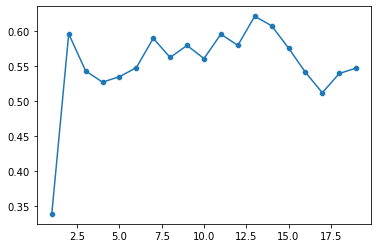

In [20]:
sns.lineplot(
    x=range(1, 20, 1),
    y=coherence_values
)
sns.scatterplot(
    x=range(1, 20, 1),
    y=coherence_values
)

<AxesSubplot:>

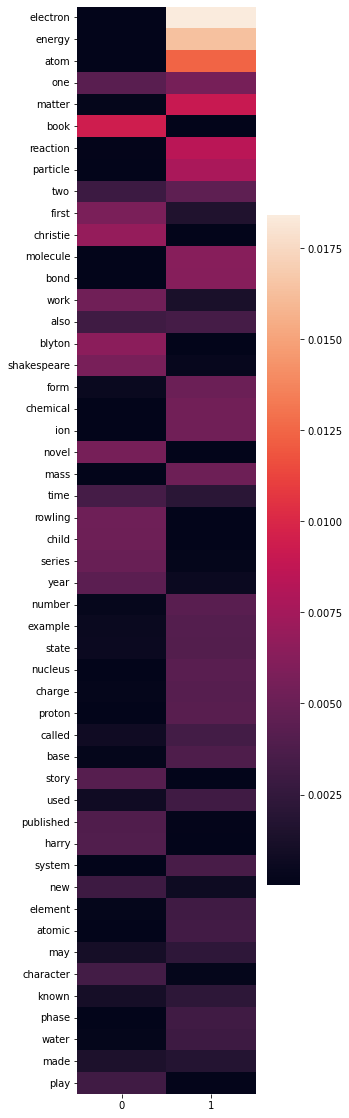

In [21]:
# Topic-term matrix as heatmap
most_common_words = [k for k, v in sorted(dic.cfs.items(), key=lambda x: x[1], reverse=True)[:50]]
words = [dic[k] for k in most_common_words]
#words_alphabetical_index = np.argsort(words)
#words_alphabetical = [words[i] for i in words_alphabetical_index]

plt.figure(figsize=(4, 20))
sns.heatmap(
    lda.get_topics()[:, most_common_words].transpose(),
    yticklabels=words
)

# Quite a few words are shared between topics, let's remove any word that received a notable score in both topics

In [22]:
def get_common_words_over_threshold(dic, lda, threshold):
    words_and_scores = lda.get_topics()
    words_to_exclude = np.where(np.sum(words_and_scores > threshold, axis=0) == lda.num_topics)[0]
    
    return [dic[i] for i in words_to_exclude]

In [23]:
# Exclude over 0.0025
get_common_words_over_threshold(dic, lda, 0.0025)

['also', 'one', 'two']

In [24]:
# Exclude over 0.001
get_common_words_over_threshold(dic, lda, 0.001)

['also',
 'described',
 'first',
 'known',
 'le',
 'made',
 'many',
 'may',
 'often',
 'one',
 'time',
 'two',
 'work',
 'would']

In [25]:
# Let's go with 0.001
words_to_exclude_001 = get_common_words_over_threshold(dic, lda, 0.001)

# Recreate objects

# Remove words from docs
docs_filtered = [
    [w for w in doc if w not in words_to_exclude_001]
    for doc in docs
]

# Create dictionary
dic_filtered = corpora.Dictionary(docs_filtered)

# Create bow matrix
bow_filtered = [dic_filtered.doc2bow(doc) for doc in docs_filtered]

# Inspect
bow_filtered

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 2),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 3),
  (25, 1),
  (26, 3),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 3),
  (32, 1),
  (33, 2),
  (34, 4),
  (35, 2),
  (36, 3),
  (37, 2),
  (38, 2),
  (39, 1),
  (40, 2),
  (41, 14),
  (42, 6),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 5),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 3),
  (52, 1),
  (53, 1),
  (54, 5),
  (55, 1),
  (56, 3),
  (57, 1),
  (58, 1),
  (59, 5),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 2),
  (66, 2),
  (67, 3),
  (68, 1),
  (69, 1),
  (70, 5),
  (71, 1),
  (72, 1),
  (73, 5),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 163),
  (86, 60),
  (87, 3),
  (88, 1),
  (89, 1),
  (90, 3),
  (91

In [26]:
# Can take a little while to run
model_list, coherence_values = compute_coherence_values(
    dictionary=dic_filtered,
    corpus=bow_filtered,
    texts=docs_filtered,
    start=1,
    limit=20,
    step=1
)

2022-04-23 11:40:36.922018 1 topics
2022-04-23 11:40:45.385060 2 topics
2022-04-23 11:40:57.638387 3 topics
2022-04-23 11:41:10.428474 4 topics
2022-04-23 11:41:23.417303 5 topics
2022-04-23 11:41:37.649702 6 topics
2022-04-23 11:41:51.703309 7 topics
2022-04-23 11:42:06.162786 8 topics
2022-04-23 11:42:21.061202 9 topics
2022-04-23 11:42:35.815713 10 topics
2022-04-23 11:42:50.433236 11 topics
2022-04-23 11:43:05.145560 12 topics
2022-04-23 11:43:20.861360 13 topics
2022-04-23 11:43:36.563216 14 topics
2022-04-23 11:43:52.750672 15 topics
2022-04-23 11:44:09.907692 16 topics
2022-04-23 11:44:26.146516 17 topics
2022-04-23 11:44:42.977241 18 topics
2022-04-23 11:45:00.448383 19 topics


<AxesSubplot:>

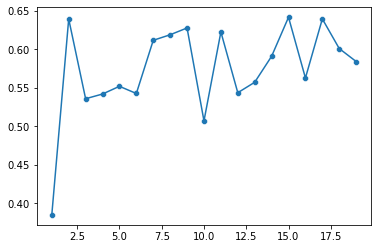

In [27]:
sns.lineplot(
    x=range(1, 20, 1),
    y=coherence_values
)
sns.scatterplot(
    x=range(1, 20, 1),
    y=coherence_values
)

In [28]:
# Train model, starting with an arbitrary 2 topics
lda_filtered = gensim.models.ldamodel.LdaModel(
    bow_filtered,
    num_topics=2,
    id2word = dic_filtered,
    passes=50,
    random_state=666
)

<AxesSubplot:>

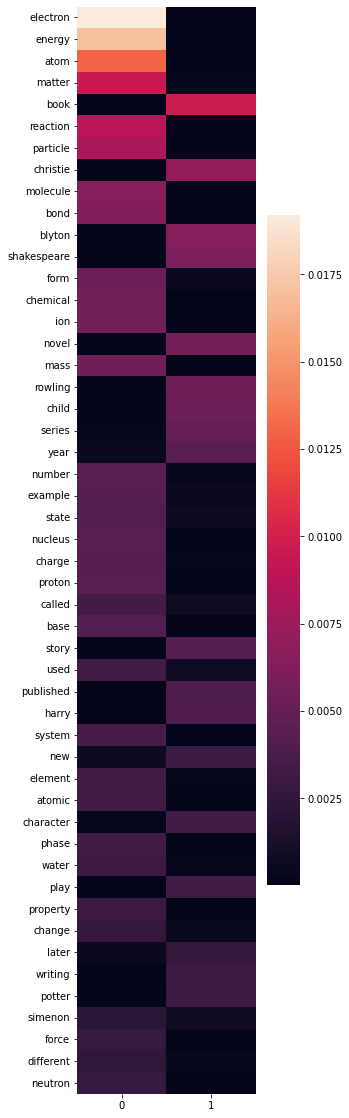

In [29]:
# Topic-term matrix as heatmap
most_common_words = [k for k, v in sorted(dic_filtered.cfs.items(), key=lambda x: x[1], reverse=True)[:50]]
words = [dic_filtered[k] for k in most_common_words]
#words_alphabetical_index = np.argsort(words)
#words_alphabetical = [words[i] for i in words_alphabetical_index]

plt.figure(figsize=(4, 20))
sns.heatmap(
    lda_filtered.get_topics()[:, most_common_words].transpose(),
    yticklabels=words
)